# Iris Flower Classification 🌸

## Project Overview
The Iris Flower Classification project aims to build a machine learning model that can accurately classify iris flowers into three different species — **Setosa**, **Versicolor**, and **Virginica** — based on their physical characteristics.

This project demonstrates a complete machine learning workflow, starting from data exploration and preprocessing to model training, evaluation, and comparison. Multiple classification algorithms are implemented and evaluated to identify the best-performing model.

### Feature Information
- Sepal Length (cm)
- Sepal Width (cm)
- Petal Length (cm)
- Petal Width (cm)

### Target Classes
- Iris-setosa
- Iris-versicolor
- Iris-virginica

## Objective
The primary objective of this project is to compare different machine learning classification algorithms and select the most accurate and reliable model for iris flower classification.

## 1. Importing Required Libraries

In [ ]:
# Importing required libraries for data analysis and visualization
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

# Ignoring warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")

# Setting visualization styles
sns.set(style="whitegrid")
plt.style.use("ggplot")


## 2. Loading the Dataset

In this step, the Iris dataset is loaded into the notebook using Pandas.  
The dataset contains measurements of iris flowers along with their corresponding species labels, which will be used to train and evaluate machine learning models.

In [306]:
# Loading the Iris dataset
df = pd.read_csv("iris_dataset.csv")

# Displaying first few rows of the dataset
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 3. Statistical Summary of the Dataset

To understand the distribution and range of numerical features in the dataset, we compute descriptive statistics such as mean, standard deviation, minimum, and maximum values.
This helps identify data spread, scale differences, and potential anomalies.


In [274]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


## 4. Dataset Structure and Data Types

In this step, we examine the structure of the dataset to understand:
- The number of rows and columns  
- Data types of each feature  
- Presence of missing or null values  

This helps ensure the dataset is clean and suitable for machine learning.


In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## 5. Dataset Dimensions

In [307]:
df.shape
print(f"rows:{df.shape[0]}")
print(f"columns:{df.shape[1]}")

rows:150
columns:5


## 6. Missing Values Check

In [277]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

## 7. Encoding the Target Variable

The target variable **species** is categorical in nature and must be converted into numerical form before training machine learning models.

Since the target variable represents class labels (not input features), **Label Encoding** is used instead of One-Hot Encoding.  
This preserves class identity without increasing dimensionality.


In [308]:
# Encoding the target variable (species)
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["species"] = le.fit_transform(df["species"])

# Display encoded class mapping
le.classes_


array(['setosa', 'versicolor', 'virginica'], dtype=object)

## 8. Duplicate Records Check

Duplicate records can introduce bias into the model and affect its generalization ability.
In this step, we check for duplicate rows in the dataset and remove them if present.


In [311]:
# Checking number of duplicate rows
print(df.duplicated().sum())

# Removing duplicate records if any
df.drop_duplicates(inplace=True)

# Verifying duplicates have been removed
print(df.duplicated().sum())


0
0


## 9. Correlation Analysis

Correlation analysis helps us understand the relationships between features in the dataset.  

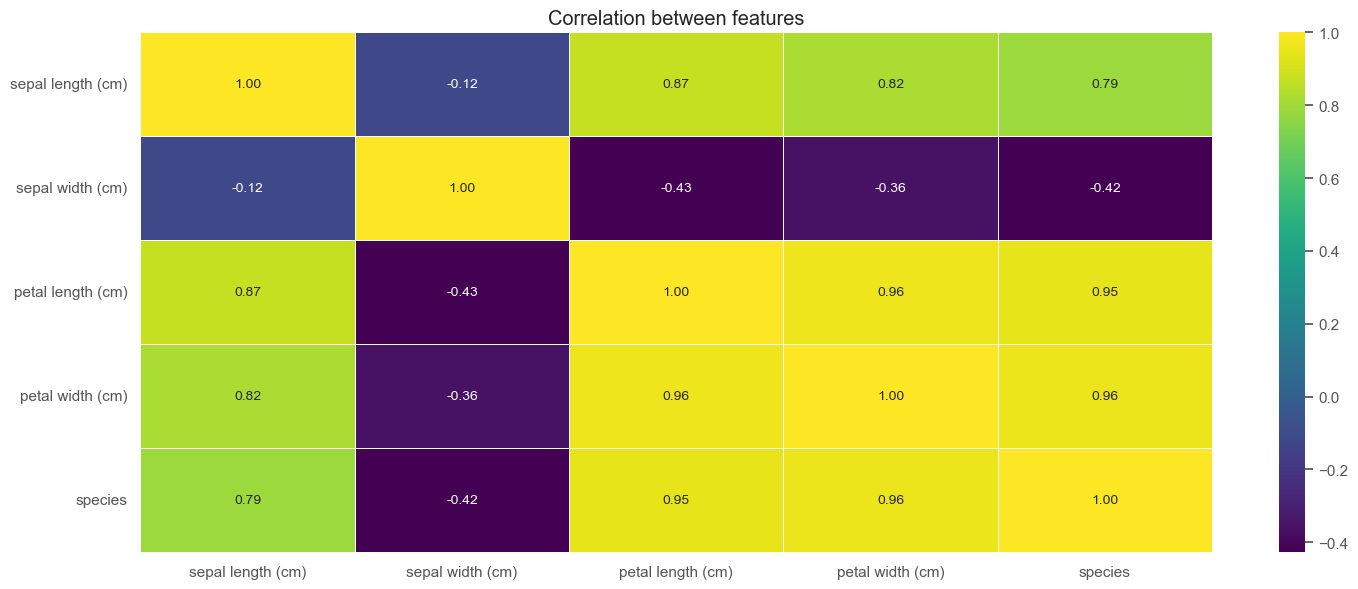

In [281]:
#heatmap 
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,fmt=".2f",cmap="viridis")
plt.title("Correlation between features")
plt.tight_layout()
plt.show()

## 10. Correlation with Target Variable

To identify which features are most relevant for predicting the target variable (**species**),  
we compute the correlation of each feature with the target.  

Features with higher absolute correlation values are likely to be more important for classification.


In [312]:
# Calculating correlation of all features with the target variable
cor_target = df.corr()["species"].sort_values(ascending=False)
cor_target

species              1.000000
petal width (cm)     0.956514
petal length (cm)    0.949402
sepal length (cm)    0.786971
sepal width (cm)    -0.422987
Name: species, dtype: float64

## 11. Splitting Features and Target

Before training machine learning models, we separate the dataset into:
- **Independent variables (features)** → Inputs used for prediction  
- **Dependent variable (target)** → The output we want to predict  

Here, the last column (`species`) is the target, and all other columns are features.


In [313]:
# Separating independent features (X) and dependent target (y)
X = df.iloc[:, :-1].values   # All columns except the last
y = df.iloc[:, -1].values    # Target column (species)

# Checking shapes
print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (149, 4)
Target shape: (149,)


In [314]:
#target class distribution 
df["species"].value_counts()

species
0    50
1    50
2    49
Name: count, dtype: int64

## 13. Splitting Dataset into Training and Testing Sets

To evaluate the performance of our machine learning models, we split the dataset into:  
- **Training set:** Used to train the model  
- **Testing set:** Used to evaluate model performance on unseen data  

We use an 80-20 split, meaning 80% of the data is used for training and 20% for testing.


In [316]:
# Importing train_test_split
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1
)

# Checking shapes to confirm split
print("X_train shape:", x_train.shape)
print("X_test shape :", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape :", y_test.shape)


X_train shape: (119, 4)
X_test shape : (30, 4)
y_train shape: (119,)
y_test shape : (30,)


## 14. Feature Scaling

Feature scaling is important because different features have different scales (e.g., sepal length vs. petal width).  
Scaling ensures that all features contribute equally to the model.
Here, we use **StandardScaler**, which standardizes features to have mean 0 and standard deviation 1.


In [317]:
#feature scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)

## 15. Hyperparameter Tuning for Logistic Regression

To improve the performance of our Logistic Regression model, we perform **hyperparameter tuning** using `RandomizedSearchCV`.  
We use 3-fold cross-validation to select the combination of hyperparameters that yields the best accuracy on the training set.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

log_reg = LogisticRegression()
penalty = ["l1","l2","elasticnet"]
C =[0.01,0.1,1,10,100]
solver = ["liblinear","newton_cg","saga"]

parameters = {"penalty":penalty,"C":C,"solver":solver}

random_search = RandomizedSearchCV(param_distributions=parameters,estimator=log_reg,n_iter=30,scoring="accuracy",n_jobs=-1,cv=3,verbose=2,random_state=1)

random_search.fit(x_train_sc,y_train)
print(f"best parameters are:{random_search.best_params_}")
print(f"best score is :{random_search.best_score_}")

best_log = random_search.best_estimator_

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV] END ....................C=0.01, penalty=l1, solver=saga; total time=   0.0s
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ....................C=0.01, penalty=l1, solver=saga; total time=   0.0s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..................C=1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..................C=1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..................C=1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..................C=1, penalty=l2, solver=newton_cg; total time=   0.0s
[CV] END ..................C=1, penalty=l2, solver=newton_cg; total time=   0.0s
[CV] END ..................C=1, penalty=l2, solver=newton_cg; total time=   0.0s
[CV] END .....................C=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ...............C=0.01, penalty=l2, solv

/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max

## 16. Hyperparameter Tuning for Random Forest Classifier

Random Forest is an ensemble learning method that combines multiple decision trees to improve accuracy and reduce overfitting.  

3-fold cross-validation ensures generalization to unseen data.


In [319]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Initialize Random Forest
rfc = RandomForestClassifier(random_state=1)

# Hyperparameter grid
param_grid_rf = {
    "n_estimators": [200, 400, 600, 800, 1000],
    "max_depth": [5, 10, 15, 25, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2"],
    "max_samples": [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    "criterion": ["gini", "entropy"]
}

# RandomizedSearchCV for Random Forest
random_search_rf = RandomizedSearchCV(
    estimator=rfc,
    param_distributions=param_grid_rf,
    n_iter=30,
    scoring="accuracy",
    n_jobs=-1,
    cv=3,
    verbose=2,
    random_state=1
)

# Fit on training data (scaled not needed for Random Forest)
random_search_rf.fit(x_train, y_train)

# Best parameters and score
print(f"Best parameters: {random_search_rf.best_params_}")
print(f"Best training accuracy: {random_search_rf.best_score_:.4f}")

# Retrieve best estimator
best_rf = random_search_rf.best_estimator_


Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV] END criterion=entropy, max_depth=15, max_features=sqrt, max_samples=0.9, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, max_samples=1.0, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, max_samples=1.0, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, max_samples=1.0, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END criterion=entropy, max_depth=15, max_features=sqrt, max_samples=0.9, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=sqrt, max_samples=0.9, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END cri

## 17. Evaluating Model Performance

After training and hyperparameter tuning, we evaluate the performance of the **Logistic Regression** and **Random Forest** models on the test set.

Metrics used:  
- **Accuracy**: Overall correctness of predictions  
- **ROC-AUC**: Ability to distinguish between classes (multi-class handled with 'ovr')  
- **F1-score (weighted)**: Balances precision and recall  
- **Classification Report**: Precision, recall, F1-score for each class

This step ensures that the selected models generalize well to unseen data.


In [321]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, f1_score

# Predictions
y_pred_log = best_log.predict(x_test_sc)
y_pred_rf = best_rf.predict(x_test)

# Logistic Regression Performance
print("=== Logistic Regression Performance ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, best_log.predict_proba(x_test_sc), multi_class='ovr'):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_log))
print(f"F1 Score (weighted): {f1_score(y_test, y_pred_log, average='weighted'):.4f}\n")

# Random Forest Performance
print("=== Random Forest Performance ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, best_rf.predict_proba(x_test), multi_class='ovr'):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print(f"F1 Score (weighted): {f1_score(y_test, y_pred_rf, average='weighted'):.4f}")


=== Logistic Regression Performance ===
Accuracy: 0.9667
ROC-AUC: 1.0000
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.92      0.96        13
           2       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

F1 Score (weighted): 0.9671

=== Random Forest Performance ===
Accuracy: 0.9333
ROC-AUC: 0.9913
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.92      0.92      0.92        13
           2       0.86      0.86      0.86         7

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

F1 Score (weighted): 

## 18. Confusion Matrix Visualization

A **confusion matrix** shows how well a classification model performs by comparing the predicted labels with the true labels.  

- Rows represent the **actual classes**  
- Columns represent the **predicted classes**  

Visualizing confusion matrices for both Logistic Regression and Random Forest allows for an easy comparison of model performance across different classes.


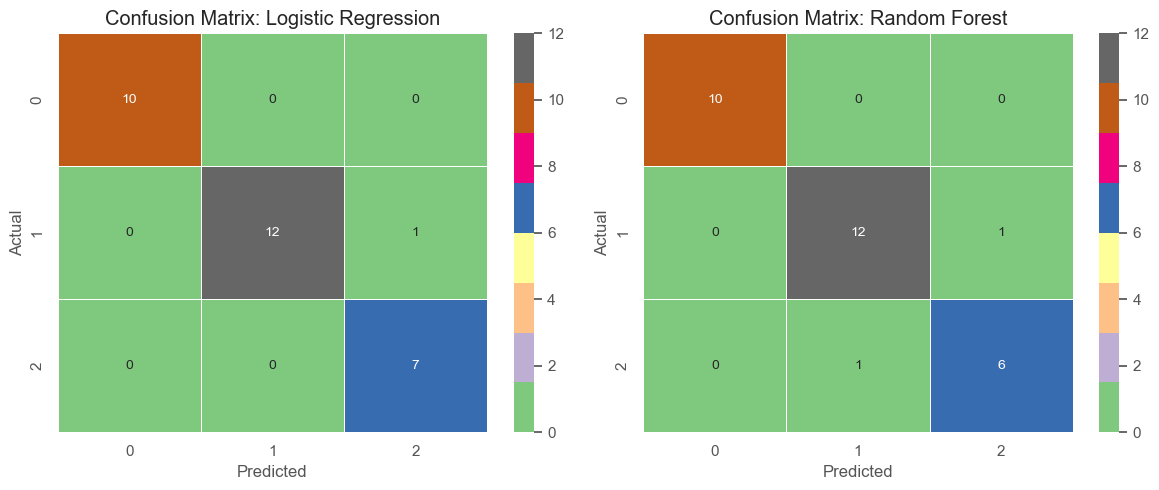

In [322]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrices
cm_log = confusion_matrix(y_test, y_pred_log)
cm_rf  = confusion_matrix(y_test, y_pred_rf)

# Plotting side by side
plt.figure(figsize=(12,5))

# Logistic Regression
plt.subplot(1,2,1)
sns.heatmap(cm_log, annot=True, cmap="Accent", linewidths=0.5, fmt='d')
plt.title("Confusion Matrix: Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Random Forest
plt.subplot(1,2,2)
sns.heatmap(cm_rf, annot=True, cmap="Accent", linewidths=0.5, fmt='d')
plt.title("Confusion Matrix: Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()


## 19. ROC-AUC Curve Visualization

The **ROC-AUC curve** measures the ability of a classifier to distinguish between classes.  
For multi-class classification, we use the **One-vs-Rest (OvR)** approach.

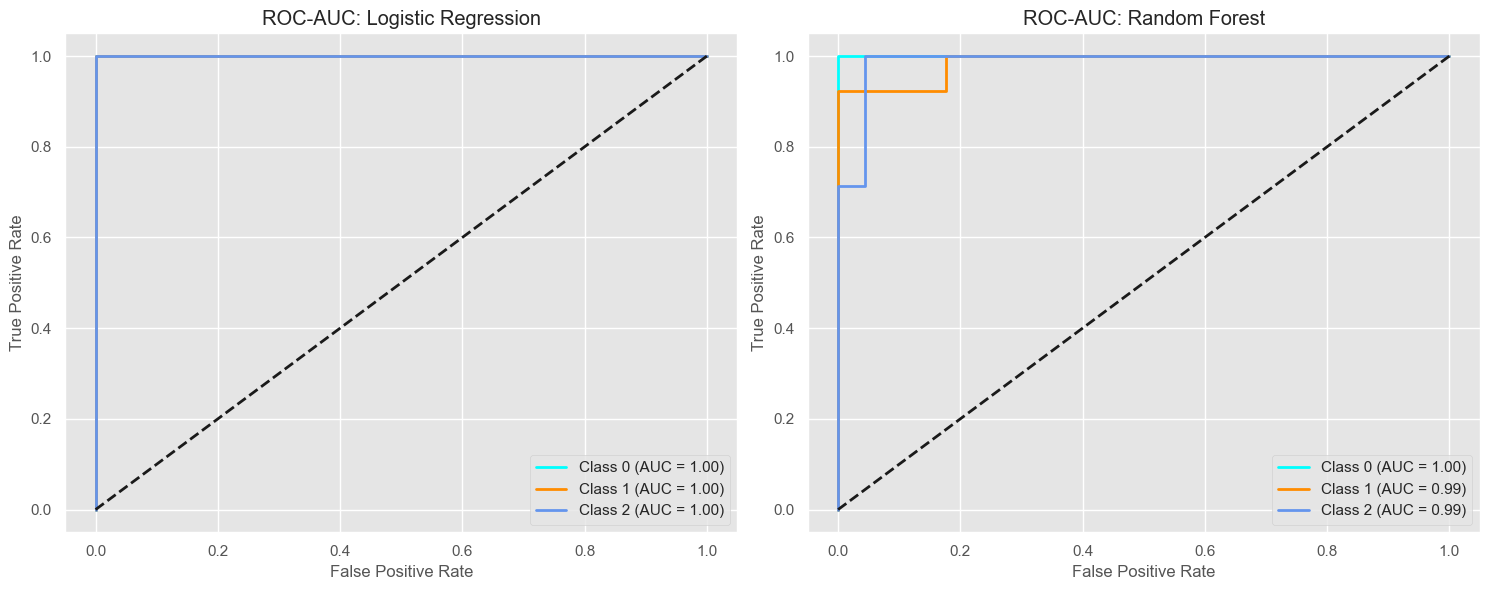

In [325]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle

# Binarize the output
y_test_bin = label_binarize(y_test, classes=[0,1,2])  # 3 classes
n_classes = y_test_bin.shape[1]

# Logistic Regression
y_score_log = best_log.predict_proba(x_test_sc)

# Random Forest
y_score_rf = best_rf.predict_proba(x_test)

# Plot ROC curves
plt.figure(figsize=(15,6))

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])

# Logistic Regression
plt.subplot(1,2,1)
for i, color in zip(range(n_classes), colors):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score_log[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--', lw=2)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC: Logistic Regression")
plt.legend(loc="lower right")

# Random Forest
plt.subplot(1,2,2)
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score_rf[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--', lw=2)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC: Random Forest")
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()


## 20. Precision-Recall Curve (Multi-Class)

Precision-Recall curves help visualize the trade-off between **precision** and **recall** for each class.  

For multi-class problems:  
1. Convert the target into one-hot format using `label_binarize`.  
2. Compute precision and recall for each class individually using predicted probabilities.  
3. Plot all class curves in a single figure to compare model performance.

This visualization complements ROC-AUC curves and gives additional insights into classifier behavior.


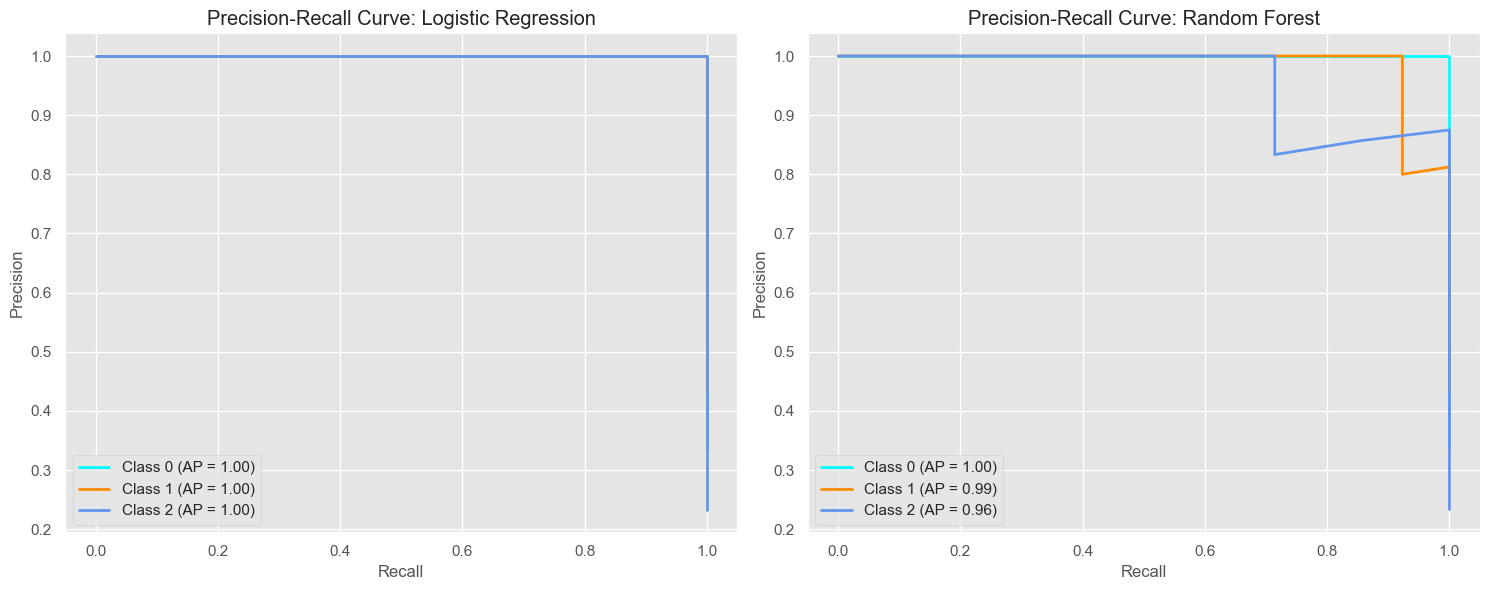

Exception ignored in: <function ResourceTracker.__del__ at 0x107be9bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


In [326]:
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from itertools import cycle

# Binarize the target
y_test_bin = label_binarize(y_test, classes=[0,1,2])
n_classes = y_test_bin.shape[1]

# Get predicted probabilities
y_score_log = best_log.predict_proba(x_test_sc)

plt.figure(figsize=(15,6))

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])

# Logistic Regression
plt.subplot(1,2,1)
for i, color in zip(range(n_classes), colors):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_score_log[:, i])
    avg_precision = average_precision_score(y_test_bin[:, i], y_score_log[:, i])
    plt.plot(recall, precision, color=color, lw=2, label=f'Class {i} (AP = {avg_precision:.2f})')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve: Logistic Regression")
plt.legend(loc="lower left")

# Random Forest
y_score_rf = best_rf.predict_proba(x_test)
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
plt.subplot(1,2,2)
for i, color in zip(range(n_classes), colors):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_score_rf[:, i])
    avg_precision = average_precision_score(y_test_bin[:, i], y_score_rf[:, i])
    plt.plot(recall, precision, color=color, lw=2, label=f'Class {i} (AP = {avg_precision:.2f})')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve: Random Forest")
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()


## 21. Feature Importance

Random Forest provides **feature importance scores**, which quantify how much each feature contributes to the model's predictions.  

             Feature  Importance
3   petal width (cm)    0.458180
2  petal length (cm)    0.421472
0  sepal length (cm)    0.109329
1   sepal width (cm)    0.011019


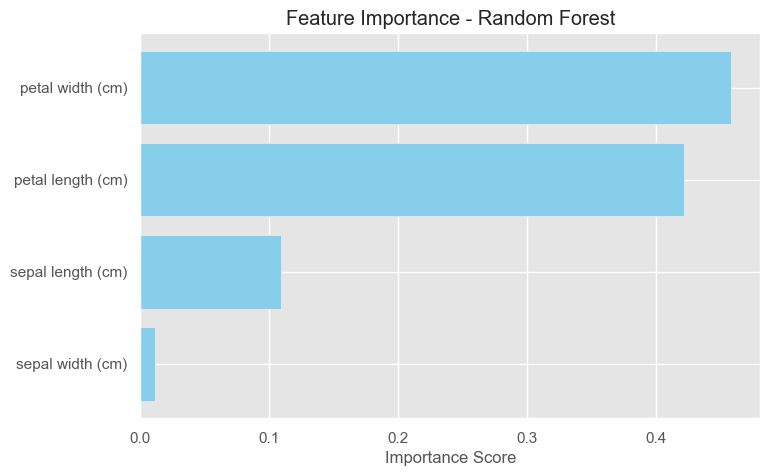

In [327]:
# Get feature importances from Random Forest
importances = best_rf.feature_importances_
feature_names = df.columns[:-1]  # all columns except target

# Create a DataFrame for better visualization
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display feature importance table
print(feat_imp_df)

# Plot feature importance
plt.figure(figsize=(8,5))
plt.barh(feat_imp_df['Feature'], feat_imp_df['Importance'], color='skyblue')
plt.xlabel("Importance Score")
plt.title("Feature Importance - Random Forest")
plt.gca().invert_yaxis()  # highest importance on top
plt.show()


## 22. Saving the model

In [328]:
import joblib

# Save logistic regression model
joblib.dump(best_log, "best_logistic_reg_model.pkl")

# Load model later
loaded_model = joblib.load("best_logistic_reg_model.pkl")
